In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import datasets:

In [2]:
raw_test_results = pd.read_csv("test_results.csv")
raw_user_table = pd.read_csv("user_table.csv")

Merge two dataset using user_id, and drop all samples with missing values.

In [3]:
raw_data = pd.merge(raw_test_results, raw_user_table, on='user_id')
raw_data = raw_data.dropna()
raw_data.head(5)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


Remove timestamp and country columns.

In [4]:
raw_data = raw_data.drop(columns=["timestamp", "country", "test"])
raw_data.head(5)

,user_id,source,device,operative_system,price,converted,city,lat,long
0,604839,ads_facebook,mobile,iOS,39,0,Buffalo,42.89,-78.86
1,624057,seo-google,mobile,android,39,0,Lakeville,44.68,-93.24
2,317970,ads-bing,mobile,android,39,0,Parma,41.38,-81.73
3,685636,direct_traffic,mobile,iOS,59,0,Fayetteville,35.07,-78.90
4,820854,ads_facebook,web,mac,39,0,Fishers,39.95,-86.02


Research Question: Does type of device (mobile or web) influences the difference in conversion rate under each price `($39 and $59)`. 

Null Hypothesis: The type of device does not influence the difference in conversion rate under each price.

Alternative Hypothesis: The type of device does influence the difference in conversion rate under each price.

Our test statistics is: Statistics = (Conversion Rate at 39 Mobile - Conversion rate at 59 Mobile) - (Conversion Rate at 39 Web - Conversion rate at 59 Web)
<br>Null Hypothesis: Test Statistics = 0
<br>Alternative Hypothesis: Test Statistic != 0

First, we further clean up the dataset

In [5]:
raw_data = raw_data.drop(columns=['user_id','source','operative_system',"city",'lat','long'])
raw_data.head(5)

,device,price,converted
0,mobile,39,0
1,mobile,39,0
2,mobile,39,0
3,mobile,59,0
4,web,39,0


In [6]:
grouped = raw_data.groupby(['device', 'price'])['converted'].mean()
grouped

device  price
mobile  39       0.019593
        59       0.016279
web     39       0.019989
        59       0.014352
Name: converted, dtype: float64

In [7]:
conversion_mobile_39 = grouped['mobile', 39]
conversion_mobile_59 = grouped['mobile', 59]
conversion_web_39 = grouped['web', 39]
conversion_web_59 = grouped['web', 59]

Calculate Observed Statistics: Statistics = (Conversion Rate at 39 Mobile - Conversion rate at 59 Mobile) - (Conversion Rate at 39 Web - Conversion rate at 59 Web)

In [8]:
observed = (conversion_mobile_39 - conversion_mobile_59) - (conversion_web_39 - conversion_web_59)
observed

np.float64(-0.0023230310007339803)

Next, we are going to simulate test statistics under null hypothesis by shuffling labels to see the influence of device on test statistics.

In [9]:
def get_shuffled_tbale(table, cata_var, num_var_list):
    """Generate a new table with shuffled catagorical variable"""
    shuffled_column = table[cata_var].sample(frac=1, replace=False).reset_index(drop=True)
    new_table = pd.DataFrame({cata_var: shuffled_column,})
    for num_var in num_var_list:
        new_table[num_var] = table[num_var]
    return new_table    

In [10]:
def get_test_statistics(tabel):
    grouped = tabel.groupby(["device", "price"])["converted"].mean()
    conversion_mobile_39 = grouped['mobile', 39]
    conversion_mobile_59 = grouped['mobile', 59]
    conversion_web_39 = grouped['web', 39]
    conversion_web_59 = grouped['web', 59]
    predicted = (conversion_mobile_39 - conversion_mobile_59) - (conversion_web_39 - conversion_web_59)
    return predicted

Below is a sample function that can automatically generate a shuffled table and generate test statistic

In [11]:
#get_test_statistics(get_shuffled_tbale(raw_data, "device", ["price", "converted"]))

Then, we reproduce the process for `10000` times and use histogram to visualize the distribution of test statistics.

In [12]:
test_statistics_list = list()
for i in range(2000):
    test_statistics_list.append(float(get_test_statistics(get_shuffled_tbale(raw_data, "device", ["price", "converted"]))))

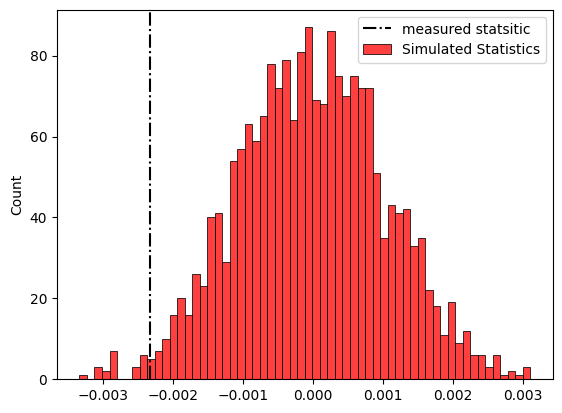

In [13]:
fig, ax = plt.subplots(1)
sns.histplot(test_statistics_list, bins=60, color="red", label='Simulated Statistics')
ax.axvline(x=observed, linestyle='-.', color='black', label='measured statsitic')
ax.legend()
plt.show()

In [14]:
p_value1 = (test_statistics_list <= observed).sum() / 1000
p_value1

np.float64(0.024)

In [29]:
! git remote main

error: unknown subcommand: `main'
usage: git remote [-v | --verbose]
   or: git remote add [-t <branch>] [-m <master>] [-f] [--tags | --no-tags] [--mirror=<fetch|push>] <name> <url>
   or: git remote rename [--[no-]progress] <old> <new>
   or: git remote remove <name>
   or: git remote set-head <name> (-a | --auto | -d | --delete | <branch>)
   or: git remote [-v | --verbose] show [-n] <name>
   or: git remote prune [-n | --dry-run] <name>
   or: git remote [-v | --verbose] update [-p | --prune] [(<group> | <remote>)...]
   or: git remote set-branches [--add] <name> <branch>...
   or: git remote get-url [--push] [--all] <name>
   or: git remote set-url [--push] <name> <newurl> [<oldurl>]
   or: git remote set-url --add <name> <newurl>
   or: git remote set-url --delete <name> <url>

    -v, --verbose         be verbose; must be placed before a subcommand

